In [2]:
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

dir = 'data/'

training_file = dir + 'train.p'
validation_file = dir + 'valid.p'
testing_file = dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Using TensorFlow backend.


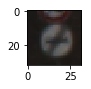

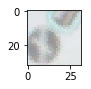

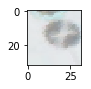

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#img = load_img('new_images/30.jpg')  # this is a PIL image
#x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = X_train[0]

plt.figure(figsize=(1,1))
plt.imshow(x, cmap="gray")
           
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    #print (batch)
    img = np.reshape(batch, (32, 32, 3))
    
    plt.figure(figsize=(1,1))
    plt.imshow(img, cmap="gray")
    i += 1
    if i >= 2:
        break  # otherwise the generator would loop indefinitely

In [28]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#for each image generated 2 augemented images
def generate_augmented_images(X_input, Y_input, copies=2):
    datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest') 
    
    X_augmented = []
    Y_augmented = []
    for idx, x in enumerate(X_input):
        x = x.reshape((1,) + x.shape)  

        i = 0
        for batch in datagen.flow(x, batch_size=1):
            img = np.reshape(batch, (32, 32, 3))
            label = Y_input[idx]
            
            X_augmented.append(img)
            Y_augmented.append(label)
            
            i += 1
            if i >= copies:
                break    
    return X_augmented, Y_augmented

In [36]:
X_augmented, Y_augmented = generate_augmented_images(X_train, y_train)
X_train.extend(X_augmented)
y_train.extend(Y_augmented)

In [37]:
len(X_augmented)

69598

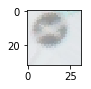

In [38]:
plt.figure(figsize=(1,1))
plt.imshow(X_augmented[0], cmap="gray")

In [39]:
print (Y_augmented[0])

41


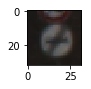

In [40]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap="gray")

In [41]:
print (y_train[0])

41


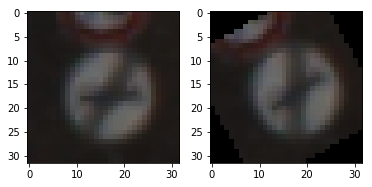

In [4]:
from scipy.ndimage import rotate
from scipy.misc import face
from matplotlib import pyplot as plt

img = X_train[0]
rot = rotate(img, 30, reshape=False)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(rot)

In [1]:
import numpy as np
from scipy.ndimage import zoom

def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [3]:
img = X_train[0]
zoom_factor = 2
zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

In [4]:
zoom_tuple

(2, 2, 1)

(290, 174, 3)


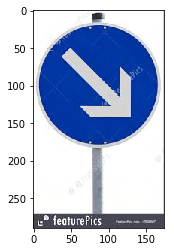

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
image = mpimg.imread('../new_images/keep_right.jpeg')
print (image.shape)
plt.imshow(image)

(170, 165, 3)


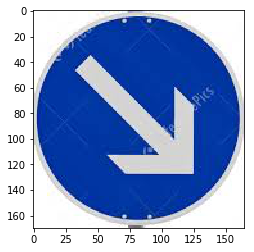

In [2]:
img1 = image[15:185,5:170]
print (img1.shape)
plt.imshow(img1)

(193, 262, 3)


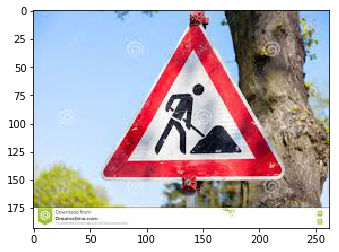

In [11]:
image = mpimg.imread('../new_images/road_work.jpeg')
print (image.shape)
plt.imshow(image)

(145, 180, 3)


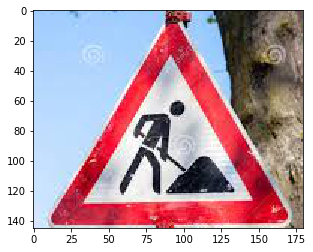

In [15]:
img1 = image[5:150,50:230]
print (img1.shape)
plt.imshow(img1)

In [16]:
mpimg.imsave('../new_images/road_work1.jpeg', img1)

In [69]:
import numpy as np
from sklearn import preprocessing

arr = [-1934.61010742,  -824.27685547, -1202.27026367,  -329.31115723,
       -1209.08691406,  -668.57165527, -1471.15039062, -1262.58520508,
       -1321.39831543,  -802.07281494, -1308.05761719, -2718.90307617,
        -242.09811401, -1236.2947998 ,  1111.52722168, -1480.33105469,
       -3400.34008789,  -403.34667969, -1607.88769531, -3446.30761719,
       -1372.5078125 , -2774.27905273,  -190.87210083, -1008.65936279,
       -2159.6496582 , -1007.80932617, -1375.80224609, -3449.39941406,
       -1205.75      ,  -602.66479492, -1421.01501465, -1778.23352051,
        -823.94903564,  -799.5614624 ,  -496.84146118,  -846.36669922,
        -980.79626465, -2352.83496094,  -605.14666748, -1563.25463867,
       -1309.65087891, -1182.45788574, -3058.87426758]

In [74]:
def normalize(x):
    return (x-np.min(x))/(np.max(x - np.min(x)))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [75]:
arr1 = normalize(arr)

In [76]:
softmax(arr1)

array([ 0.02006013,  0.02558942,  0.02355416,  0.02852275,  0.02351899,
        0.0264781 ,  0.02220571,  0.02324473,  0.02294691,  0.0257143 ,
        0.02301413,  0.0168909 ,  0.02907341,  0.0233791 ,  0.03911912,
        0.02216106,  0.01454675,  0.02806349,  0.02154986,  0.01440088,
        0.0226912 ,  0.01668706,  0.02940178,  0.02457556,  0.01909437,
        0.02458014,  0.02267482,  0.01439112,  0.0235362 ,  0.0268635 ,
        0.02245115,  0.02075984,  0.02559126,  0.02572847,  0.02749407,
        0.02546578,  0.02472615,  0.01830249,  0.02684888,  0.02176178,
        0.02300609,  0.0236567 ,  0.01567764])

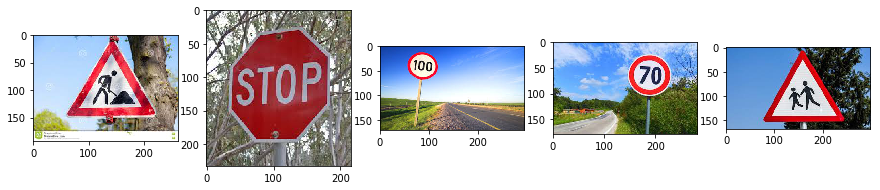

In [98]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig = plt.figure(figsize=(15,15))
a=fig.add_subplot(1,5,1)
img = mpimg.imread('../new_images/road_work.jpeg')
imgplot = plt.imshow(img)

a=fig.add_subplot(1,5,2)
img = mpimg.imread('../new_images/stop.jpeg')
imgplot = plt.imshow(img)

a=fig.add_subplot(1,5,3)
img = mpimg.imread('../new_images/100.jpeg')
imgplot = plt.imshow(img)

a=fig.add_subplot(1,5,4)
img = mpimg.imread('../new_images/70.jpeg')
imgplot = plt.imshow(img)

a=fig.add_subplot(1,5,5)
img = mpimg.imread('../new_images/children_crossing.jpeg')
imgplot = plt.imshow(img)